In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
X = data.drop(['target'], axis=1)

In [11]:
y= data['target']

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
# Scaling the data to a range that will be efficient to execute
scaler = StandardScaler()

In [24]:
stan_scaler = scaler.fit_transform(X)

In [27]:
X = stan_scaler

In [29]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
logr = LogisticRegression()

In [33]:
logr.fit(X_train,y_train)

LogisticRegression()

In [34]:
model = logr.predict(X_test)

In [59]:
model

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [36]:
error = y_test-model

In [65]:
pred_data = pd.DataFrame({'predicted_values':model, 'error_margin':error})

In [92]:
X_test_not_arr = pd.DataFrame(X_test,columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])

In [93]:
X_test_not_arr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.834359,-1.511706,-0.915755,-0.434752,-0.717508,-0.418878,0.891255,0.603877,-0.712287,-0.912329,0.995433,-0.731971,-0.522122
1,-0.158157,-1.511706,1.027618,-0.206287,-0.581764,-0.418878,-1.004049,-1.483579,-0.712287,-0.912329,0.995433,-0.731971,-3.746070
2,0.062402,0.661504,-0.915755,1.621431,0.833861,-0.418878,-1.004049,-0.178919,1.403928,-0.231177,-0.624121,0.238625,1.089852
3,-0.488996,-1.511706,0.055931,-0.663216,-0.038784,-0.418878,0.891255,0.560389,-0.712287,0.024256,0.995433,-0.731971,-0.522122
4,-0.709555,0.661504,-0.915755,-0.092055,0.193921,2.387330,-1.004049,0.038525,1.403928,-0.912329,0.995433,1.209221,1.089852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,-0.930114,0.661504,-0.915755,0.479107,1.260488,-0.418878,0.891255,-1.266135,1.403928,0.620264,-0.624121,1.209221,1.089852
335,-0.930114,0.661504,-0.915755,0.479107,1.260488,-0.418878,0.891255,-1.266135,1.403928,0.620264,-0.624121,1.209221,1.089852
336,-1.702071,0.661504,1.027618,0.479107,1.454409,-0.418878,-1.004049,1.430162,-0.712287,-0.912329,0.995433,-0.731971,-0.522122
337,0.503520,0.661504,1.999305,2.649522,0.465411,-0.418878,-1.004049,-0.178919,-0.712287,2.663722,-2.243675,-0.731971,1.089852


In [99]:
new_data = pd.concat([y_test,pred_data], axis=1)

In [100]:
new_data

,target,predicted_values,error_margin
527,1,1,0
359,1,1,0
447,0,0,0
31,1,1,0
621,0,0,0
...,...,...,...
601,0,0,0
728,0,0,0
478,1,1,0
896,1,0,1


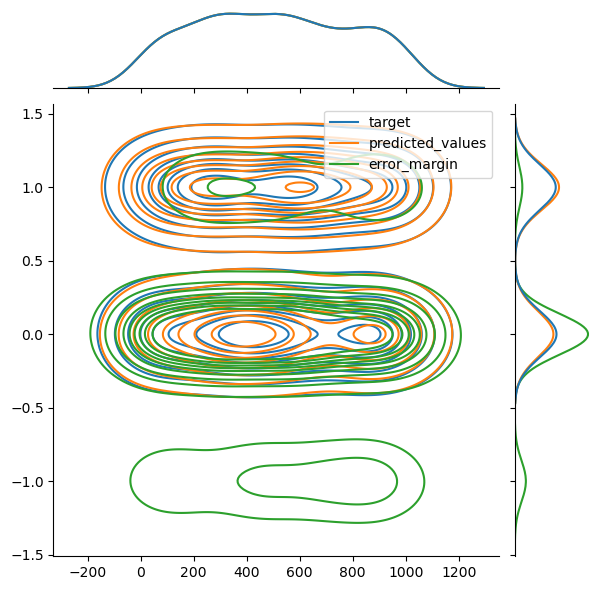

In [123]:
sns.jointplot(new_data,kind='kde')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


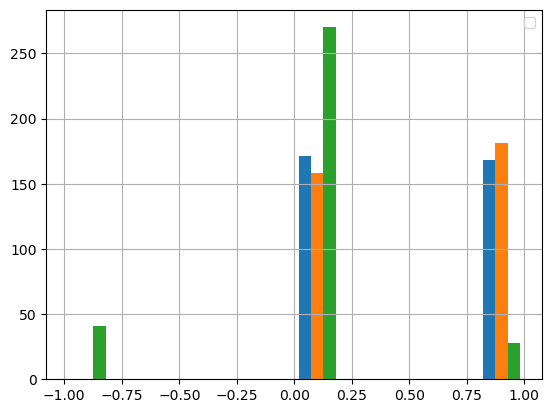

In [118]:
plt.hist(new_data)
plt.grid()

In [41]:
accuracy_score = logr.score(X_train,y_train)

In [42]:
accuracy_score

0.8673469387755102

In [44]:
logr.score(X_test,y_test)

0.7964601769911505